# Importing

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')



In [3]:
file_path = './data/'


train = pd.read_csv(file_path + 'train.csv')
oil = pd.read_csv(file_path + 'oil.csv')
stores = pd.read_csv(file_path + 'stores.csv')
holidays = pd.read_csv(file_path + 'holidays_events.csv')
transactions = pd.read_csv(file_path + 'transactions.csv')

# Train dataset analysis

In [4]:
train.set_index('id', inplace=True)
train

date  store_nbr                      family     sales   
id                                                                     
0        2013-01-01          1                  AUTOMOTIVE     0.000  \
1        2013-01-01          1                   BABY CARE     0.000   
2        2013-01-01          1                      BEAUTY     0.000   
3        2013-01-01          1                   BEVERAGES     0.000   
4        2013-01-01          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
3000883  2017-08-15          9                     POULTRY   438.133   
3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
id                    
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 5 columns]

In [5]:
train.dtypes

date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [6]:
train['date'] = pd.to_datetime(train['date'])


In [7]:
families = train['family'].unique()

train_fam = {}

for family in families:
    df = train[train['family'] == family].copy()
    df.drop('family', axis=1, inplace=True)
    train_fam[family] = df

In [12]:
df = train_fam['AUTOMOTIVE']
df.describe()

date    store_nbr         sales   onpromotion
count                          90936  90936.00000  90936.000000  90936.000000
mean   2015-04-24 08:27:04.703087616     27.50000      6.101236      0.052597
min              2013-01-01 00:00:00      1.00000      0.000000      0.000000
25%              2014-02-26 18:00:00     14.00000      2.000000      0.000000
50%              2015-04-24 12:00:00     27.50000      5.000000      0.000000
75%              2016-06-19 06:00:00     41.00000      8.000000      0.000000
max              2017-08-15 00:00:00     54.00000    255.000000      8.000000
std                              NaN     15.58587      6.191691      0.341184

In [38]:
df = train_fam[families[0]]

def ploter(df):
    # list gymnastics to get sales in the
    column = list(df.columns)
    lis = column[:-1]
    lis.insert(0, column[-1])
    column = lis
    
    

    #plot_types = ['line', 'scatter', 'bar', 'barh', 'hist', 'pie', 'area', 'box', 'kde', 'hexbin']


    for col in column:
        if (col == 'sales'):
            break
    
    
        sns.scatterplot(data=df, x=str(col), y = 'sales')
    
        plt.ylabel('Sales')
        plt.xlabel(str(col))
        plt.title('Sales over ' + str(col))
    
        plt.ylim(1, 75)
    
    
        #plt.tight_layout()
        plt.show()
    
    

AUTOMOTIVE


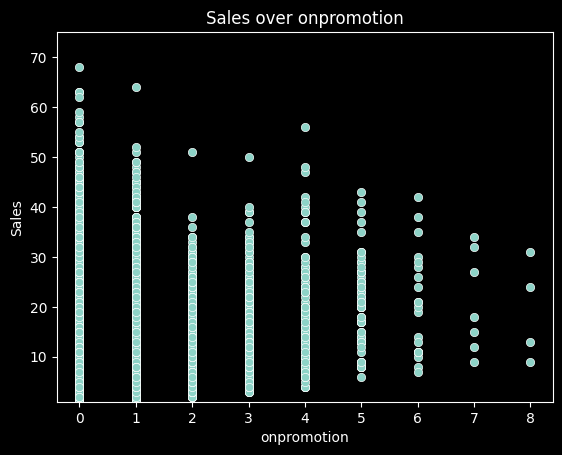

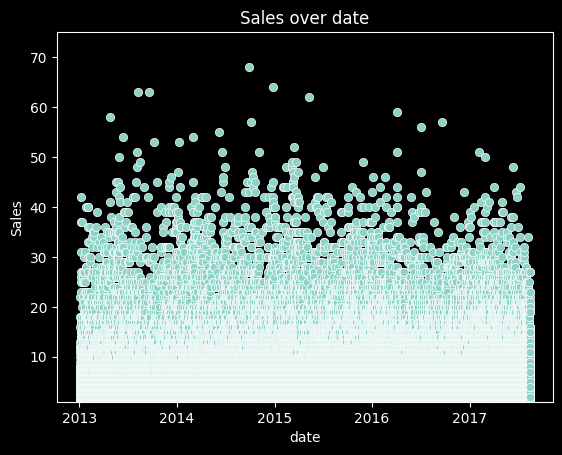

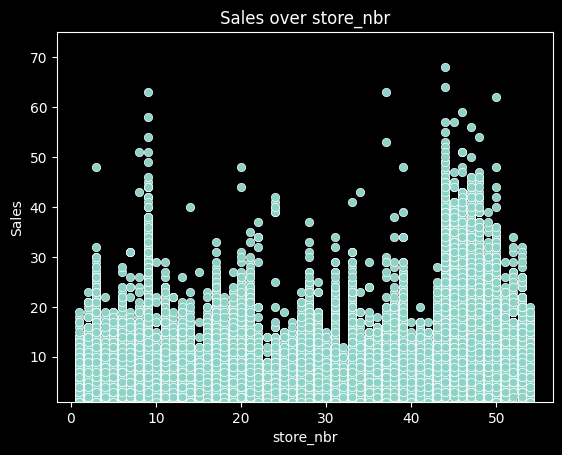

BABY CARE


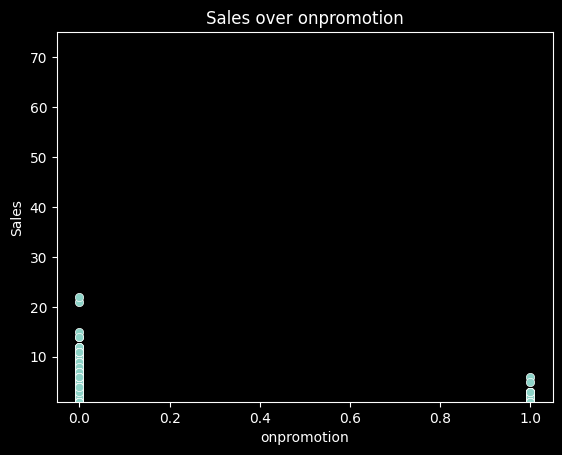

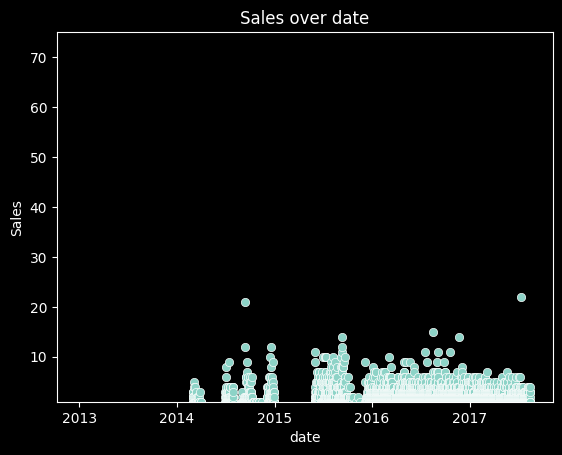

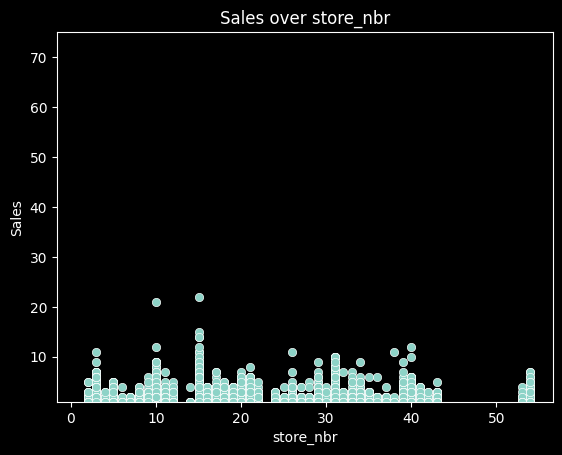

BEAUTY


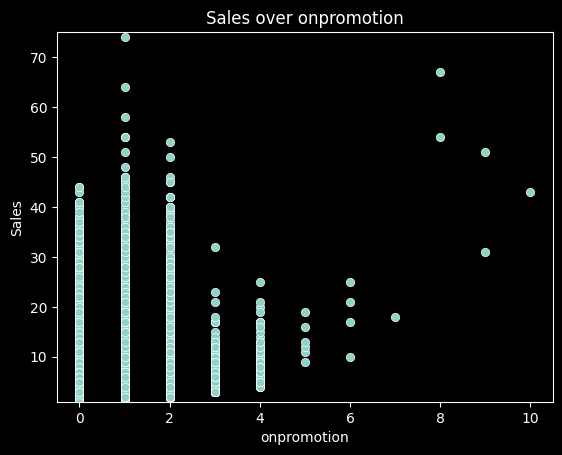

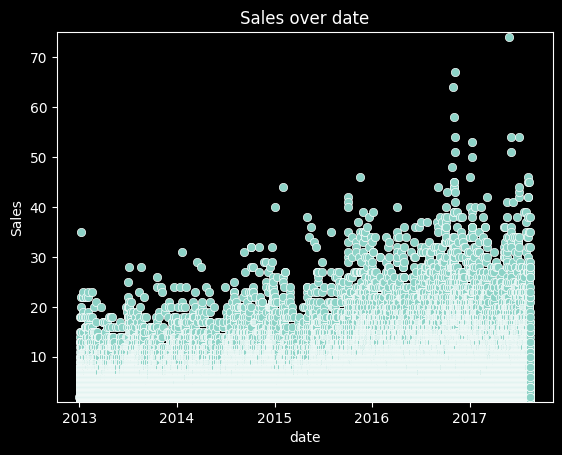

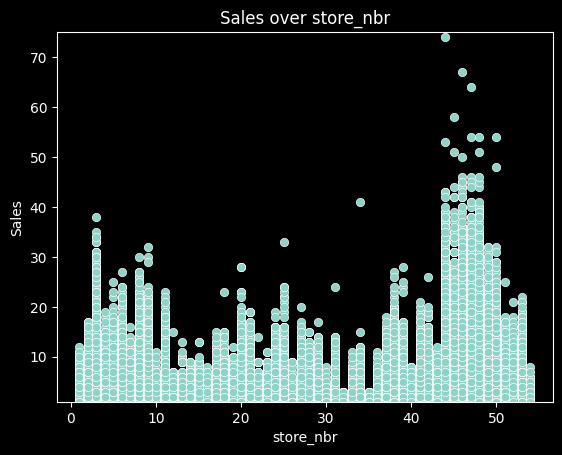

BEVERAGES


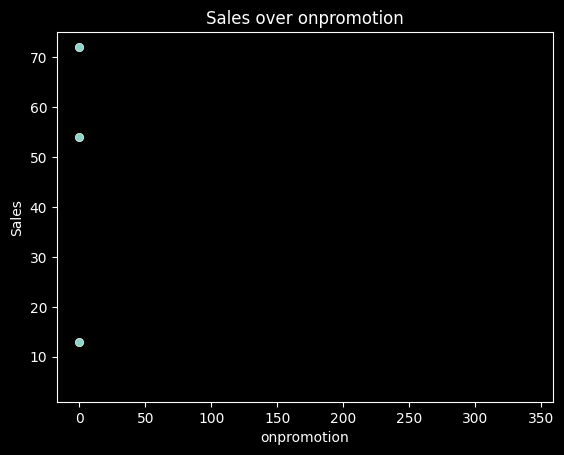

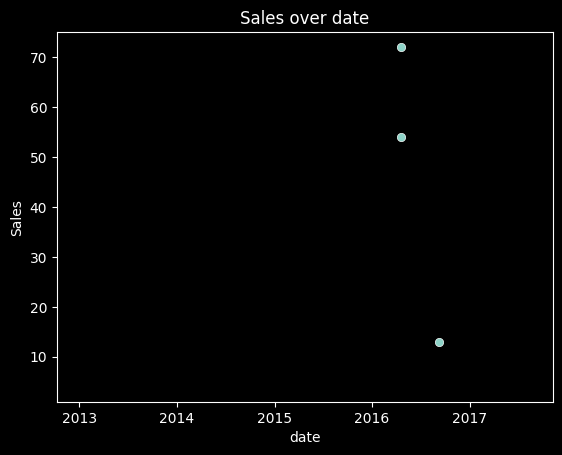

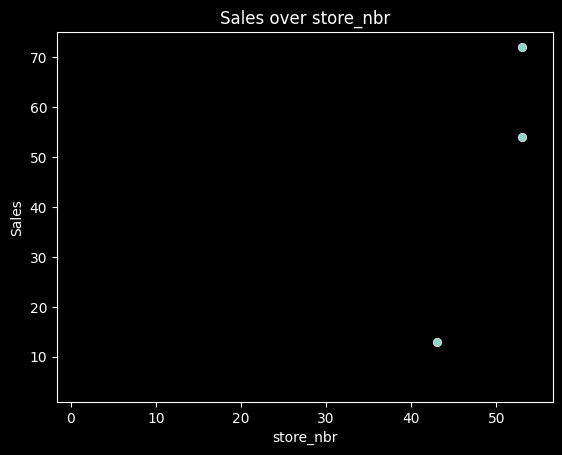

BOOKS


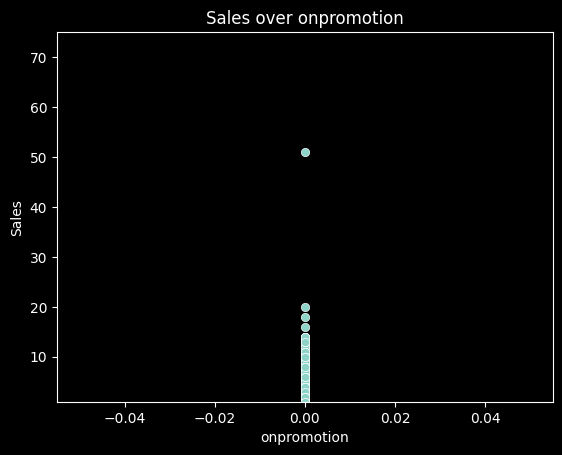

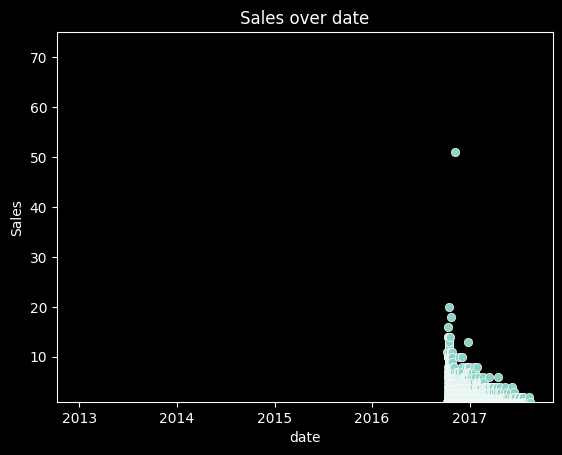

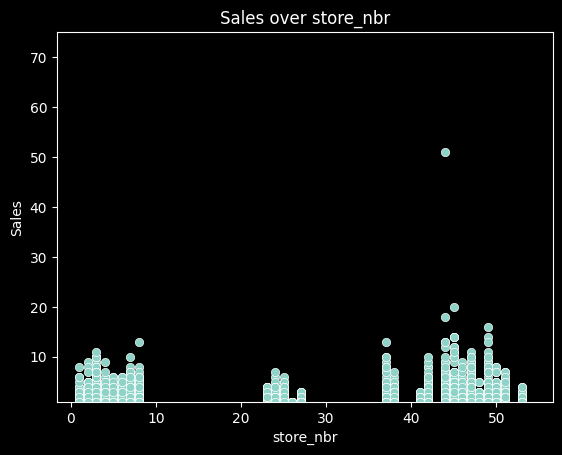

BREAD/BAKERY


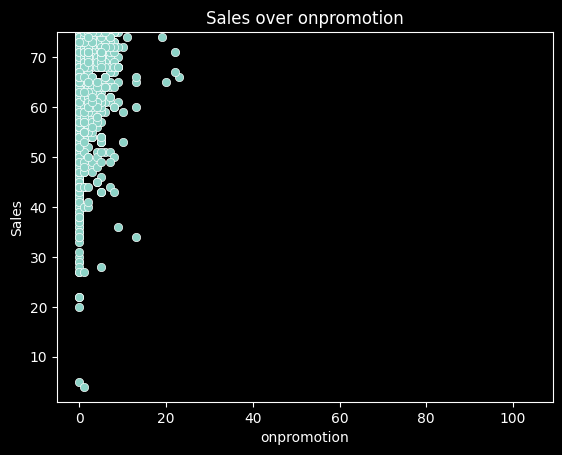

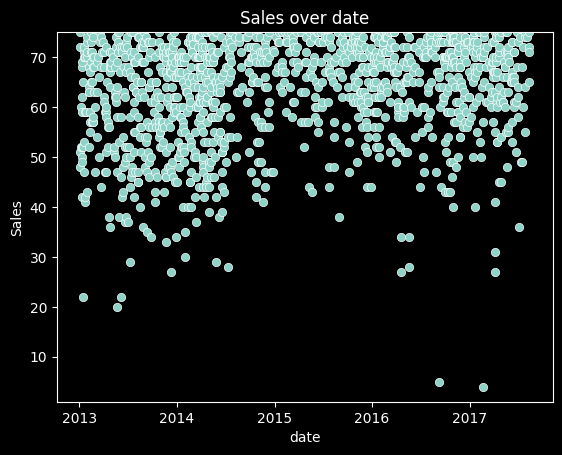

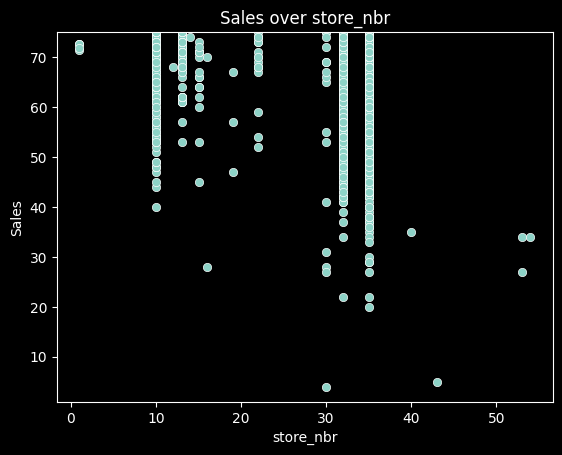

CELEBRATION


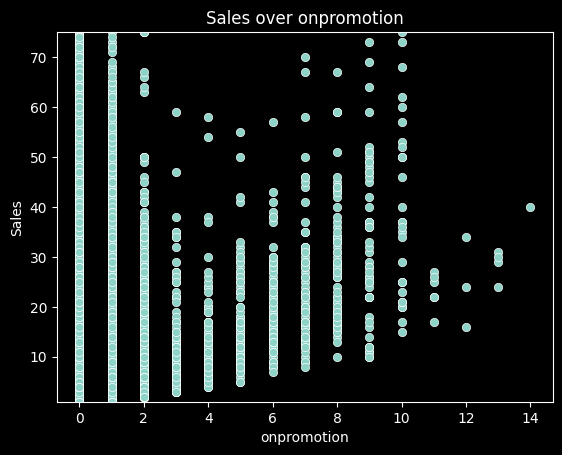

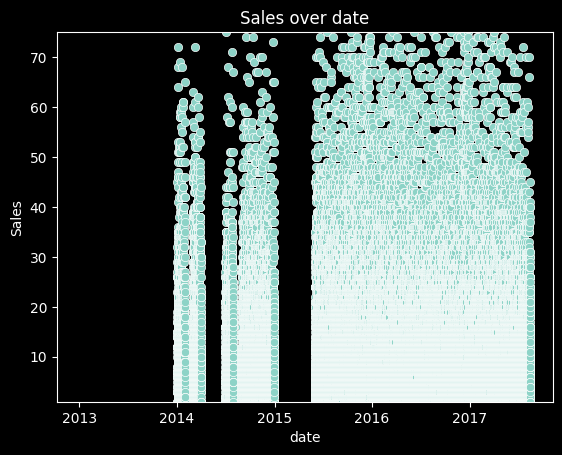

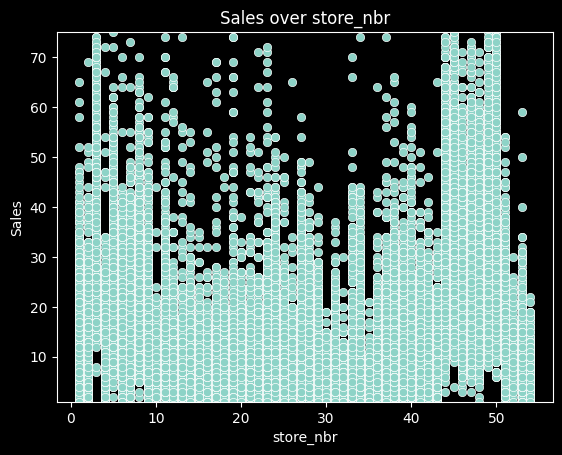

CLEANING


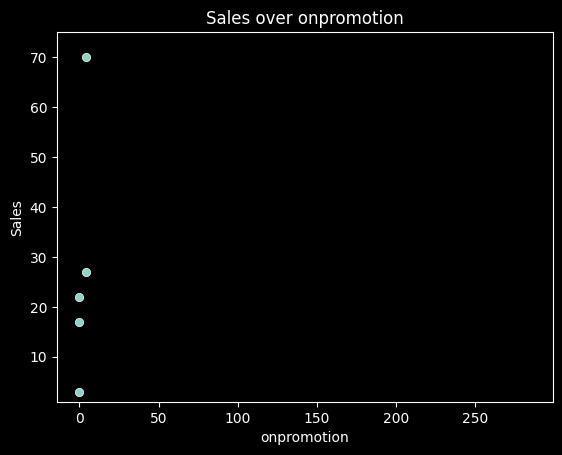

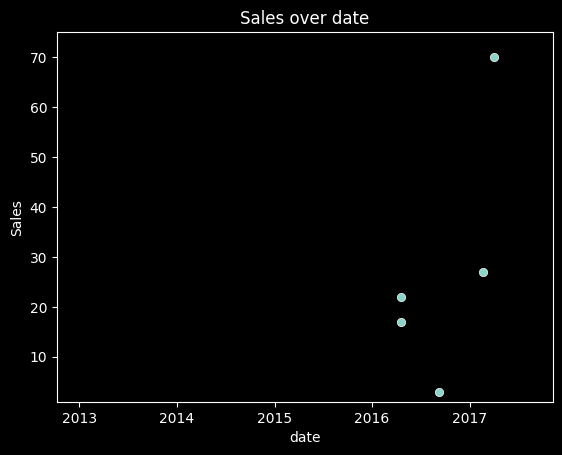

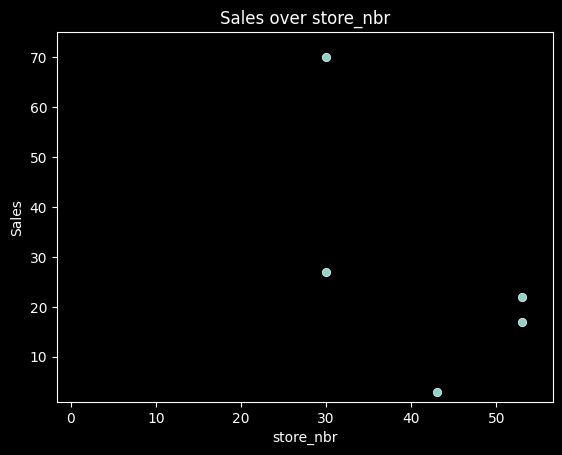

DAIRY


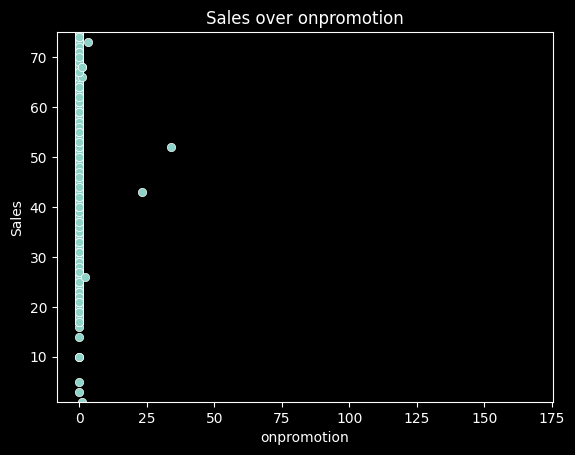

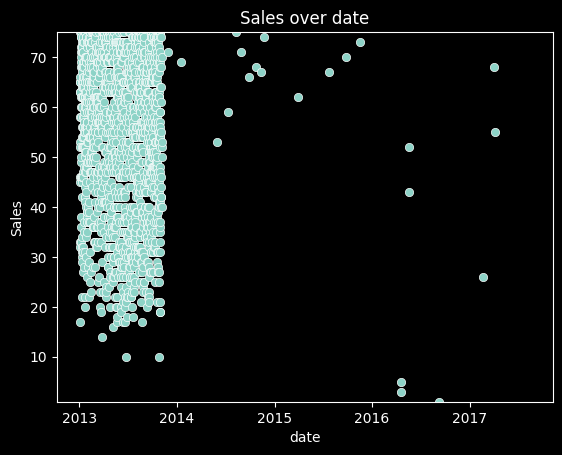

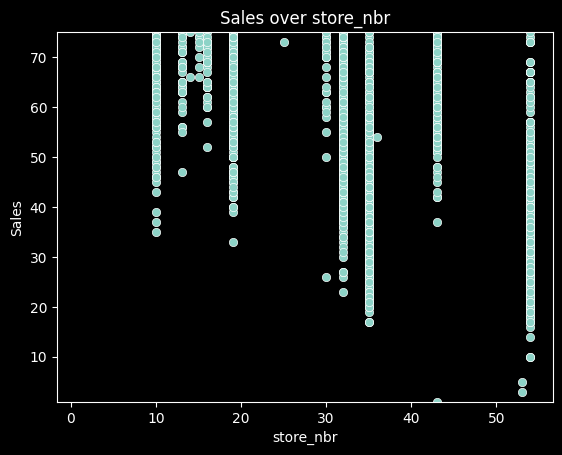

DELI


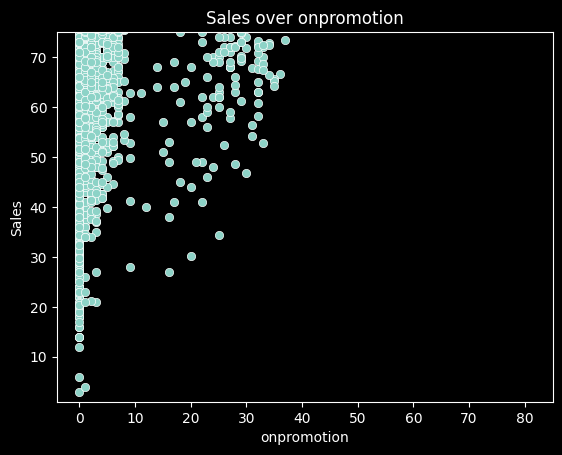

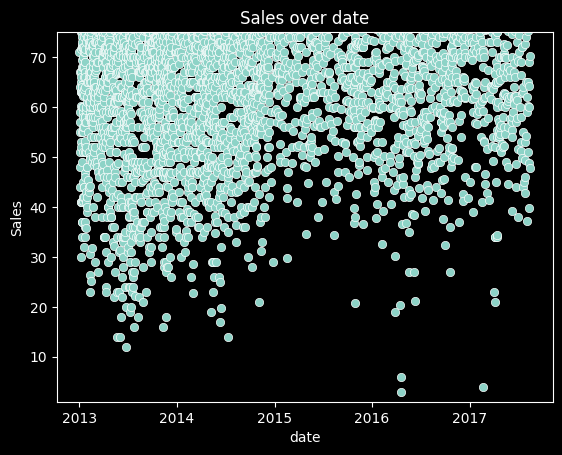

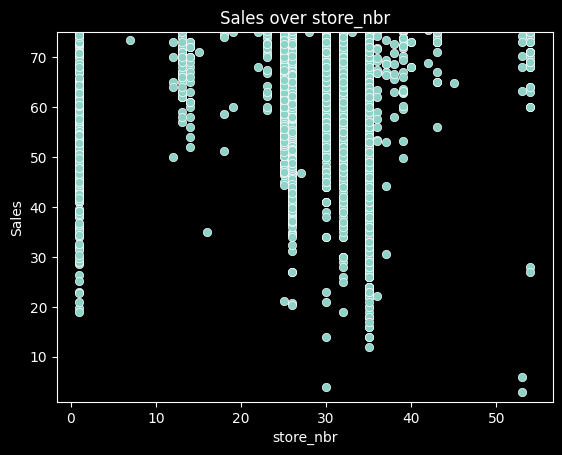

EGGS


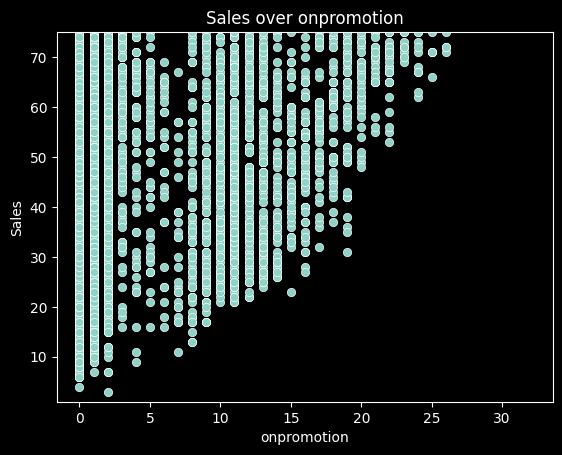

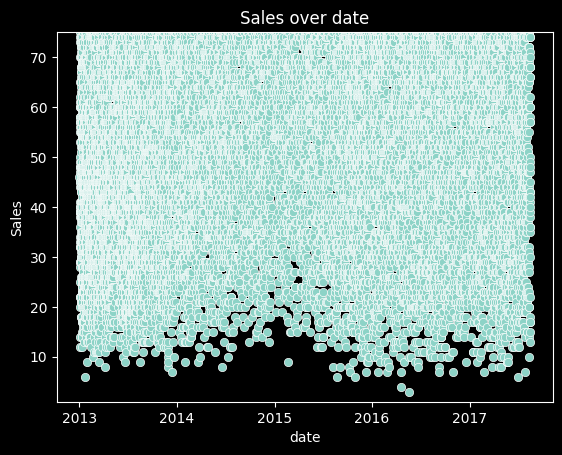

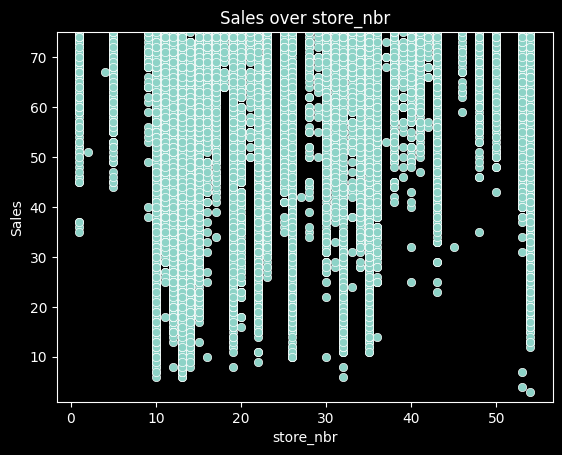

FROZEN FOODS


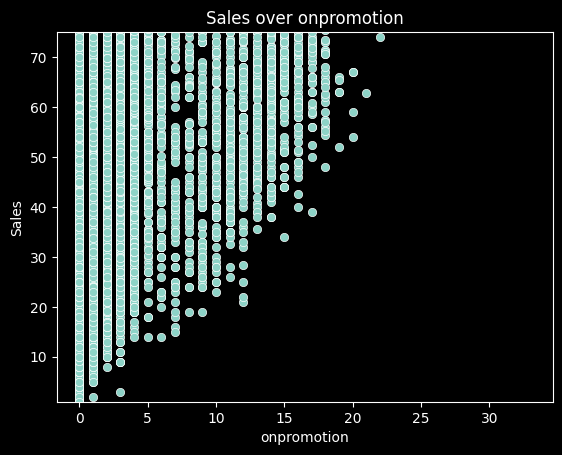

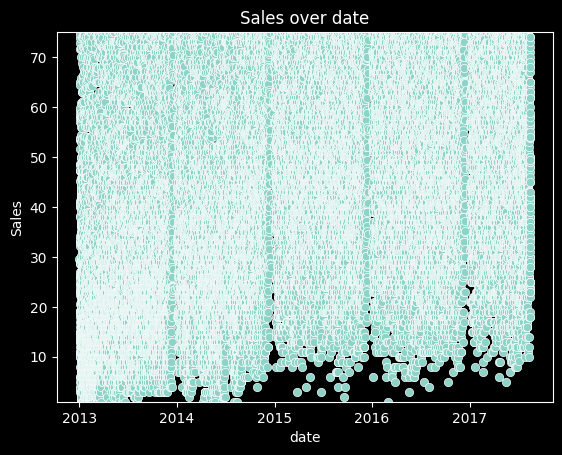

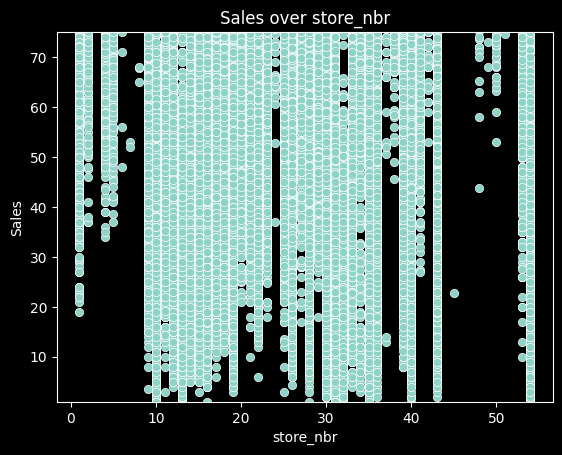

GROCERY I


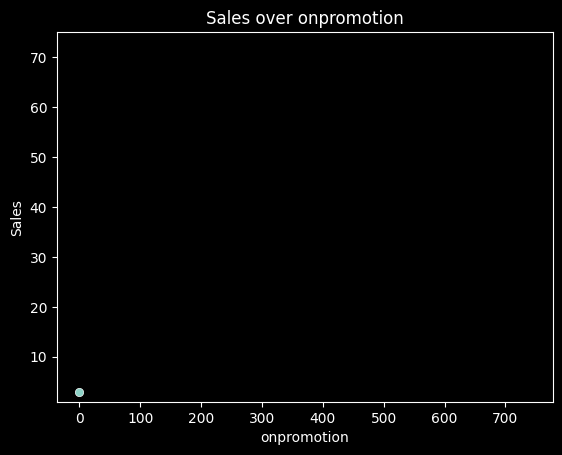

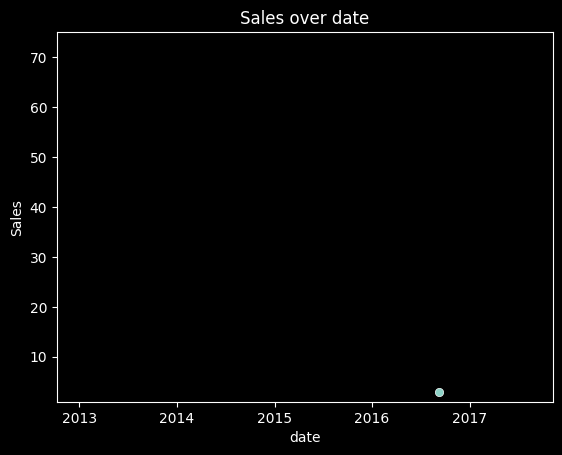

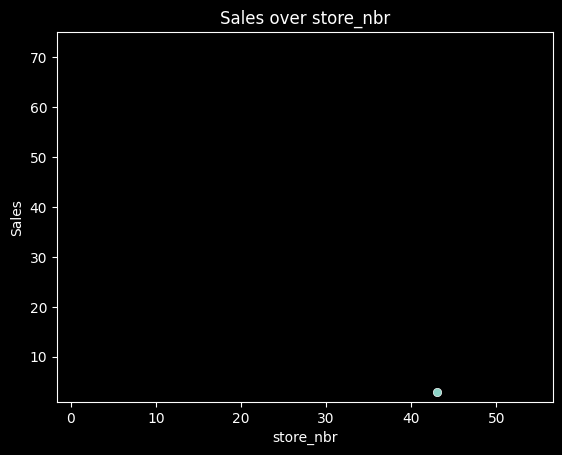

GROCERY II


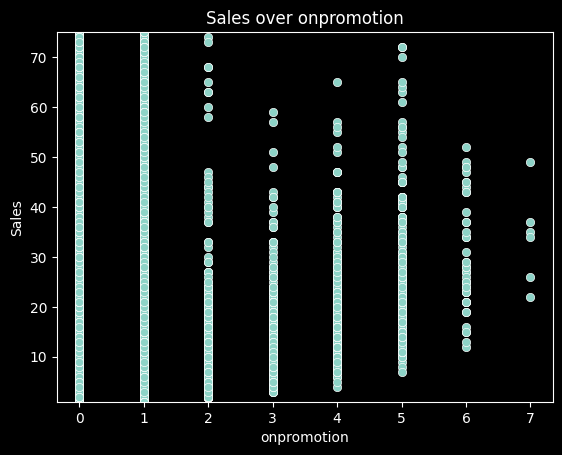

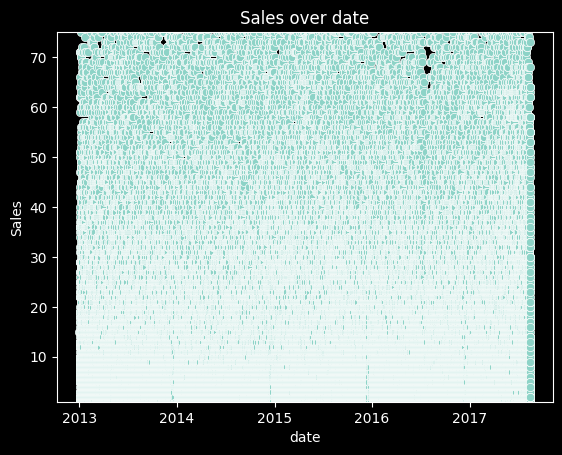

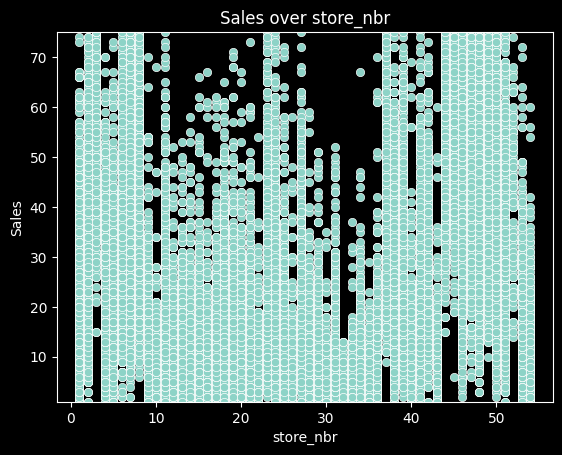

HARDWARE


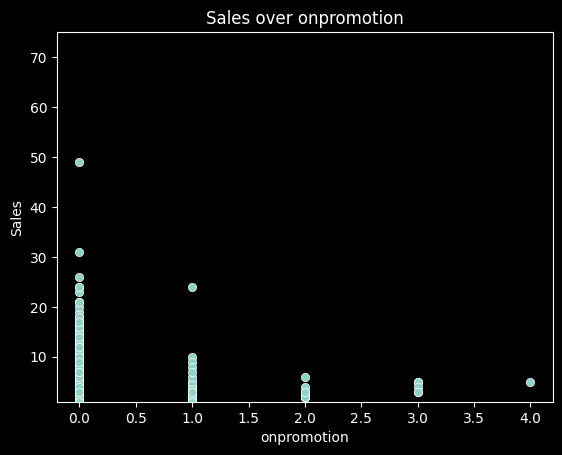

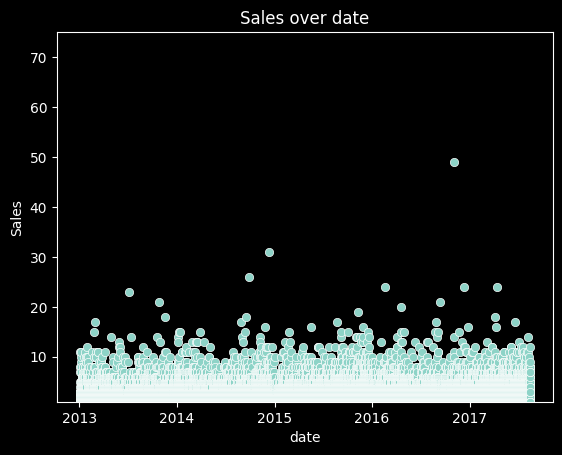

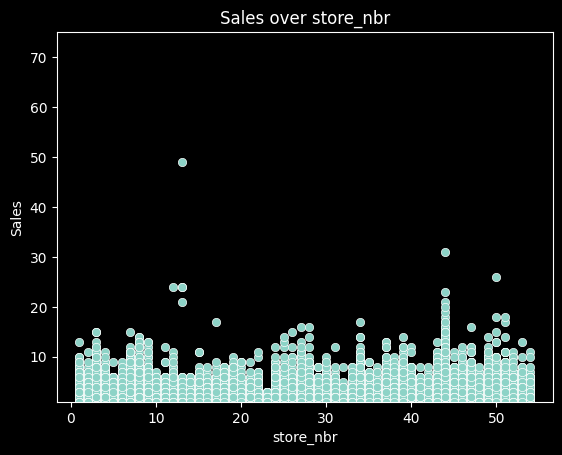

HOME AND KITCHEN I


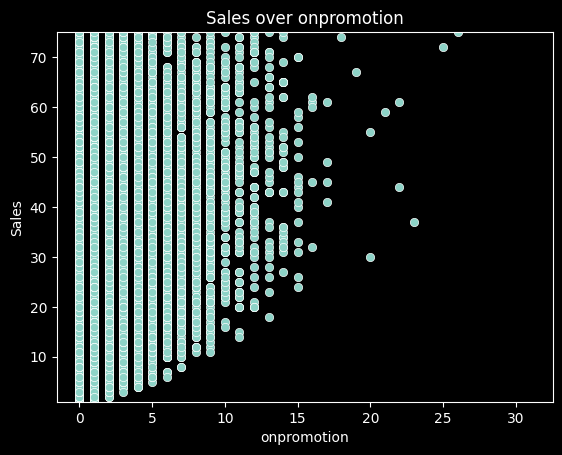

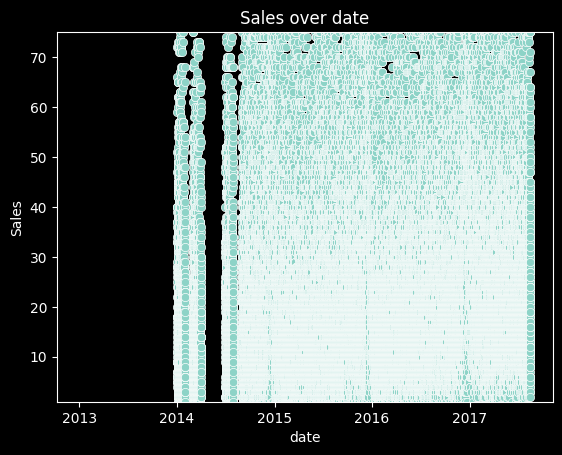

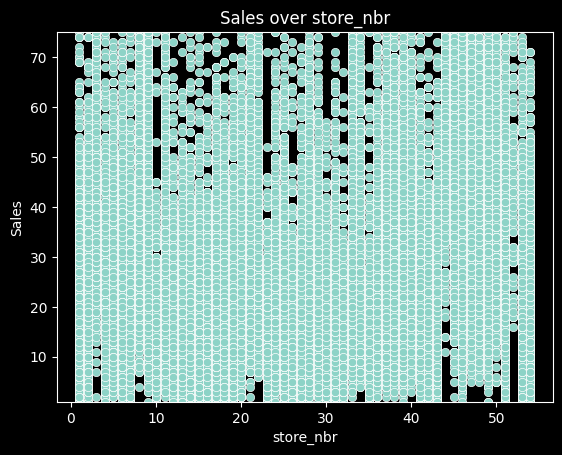

HOME AND KITCHEN II


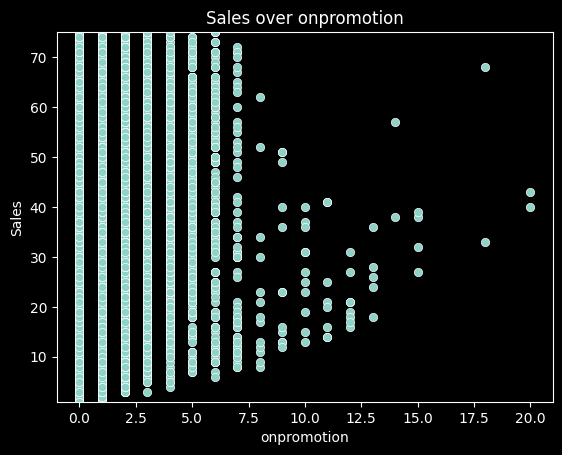

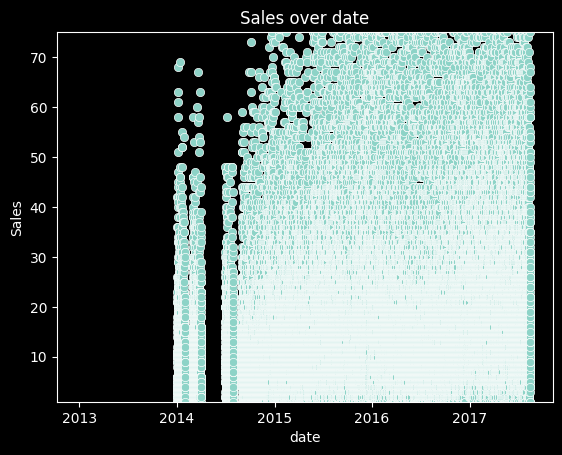

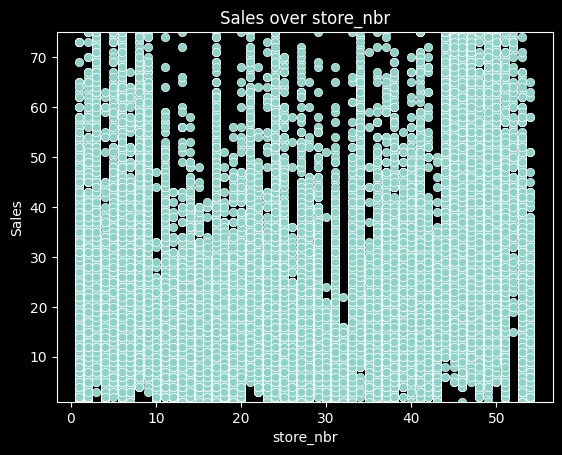

HOME APPLIANCES


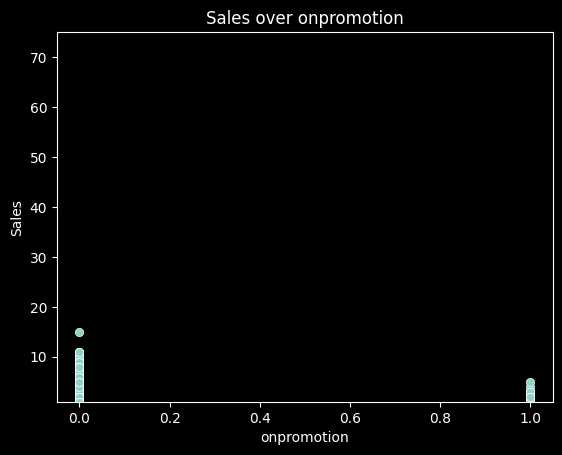

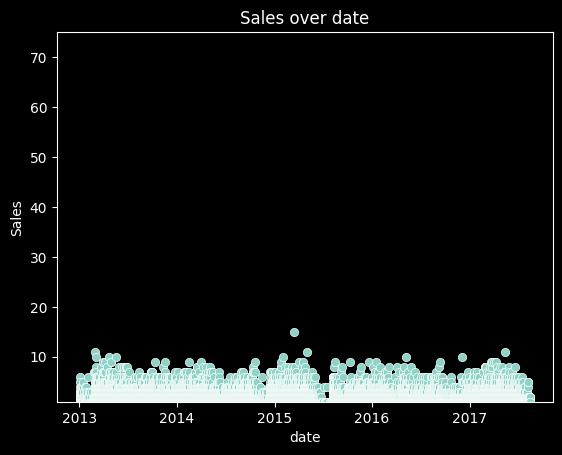

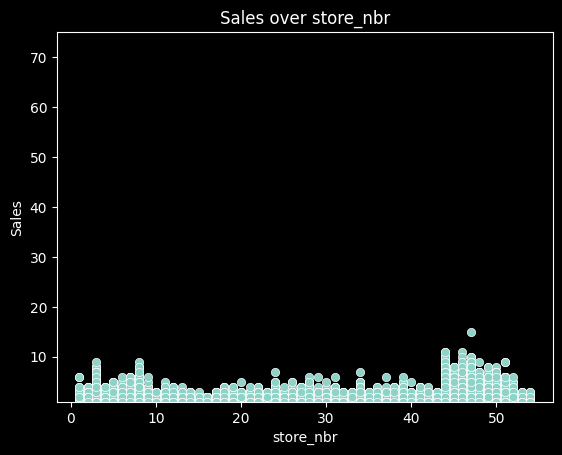

HOME CARE


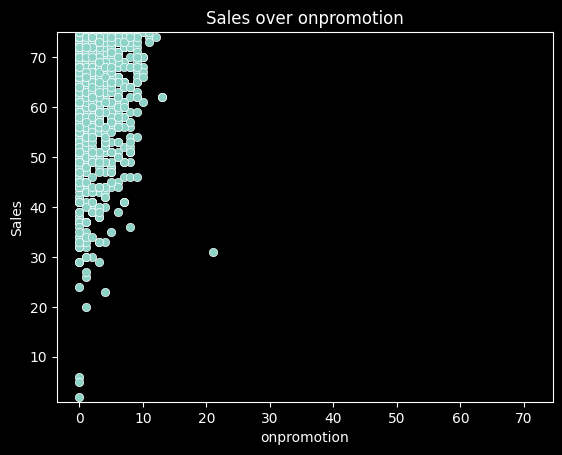

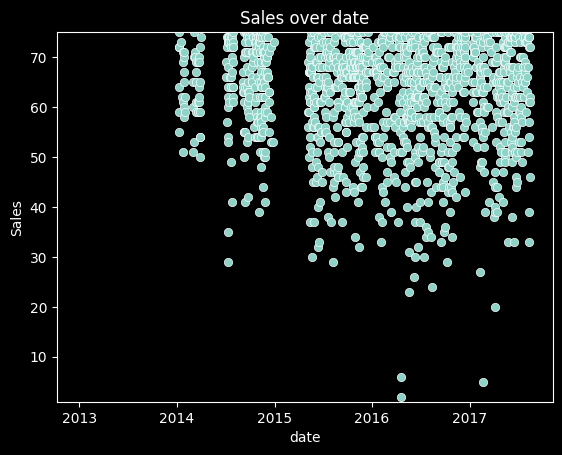

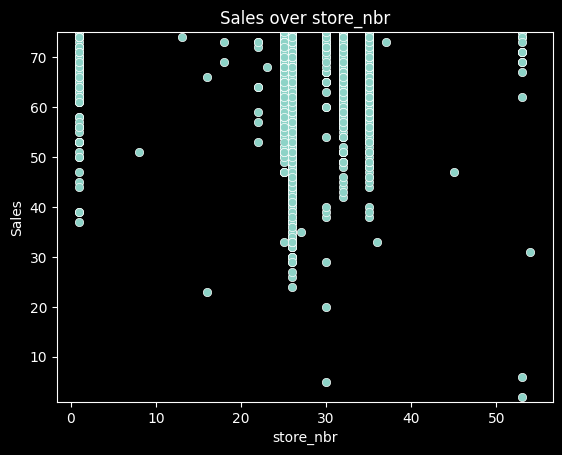

LADIESWEAR


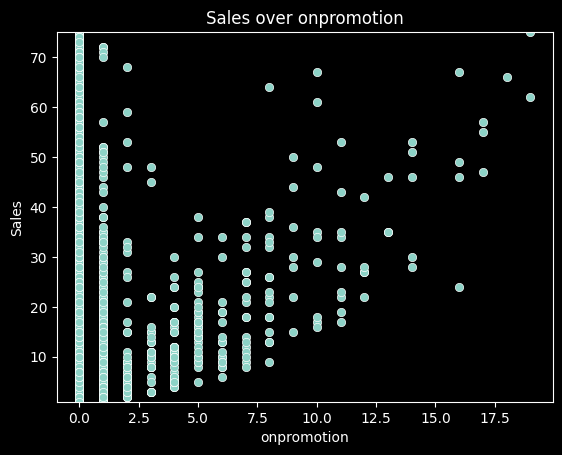

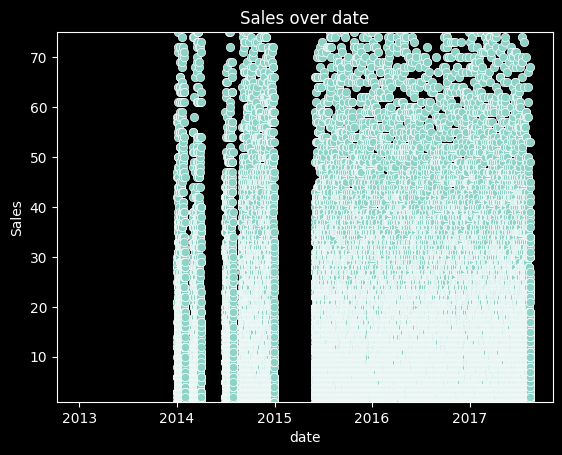

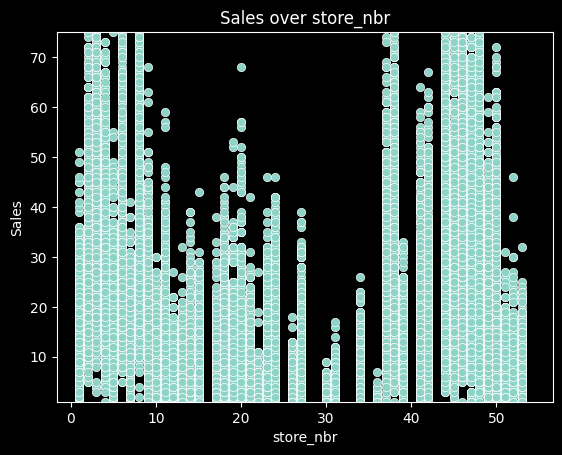

LAWN AND GARDEN


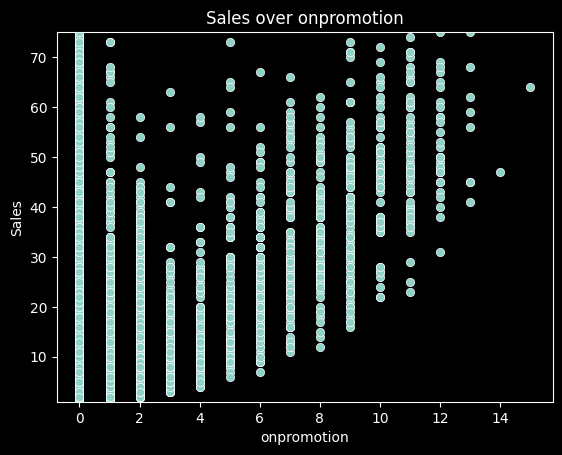

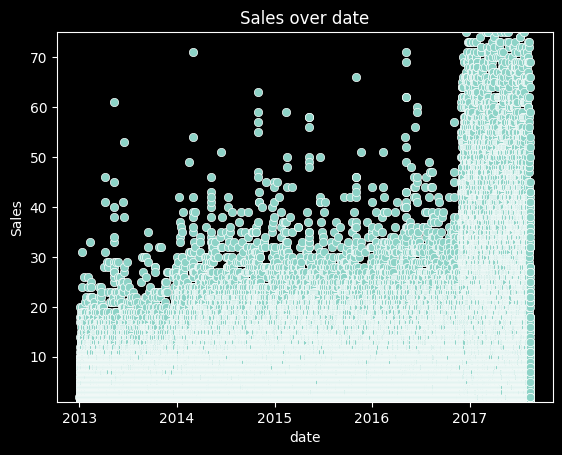

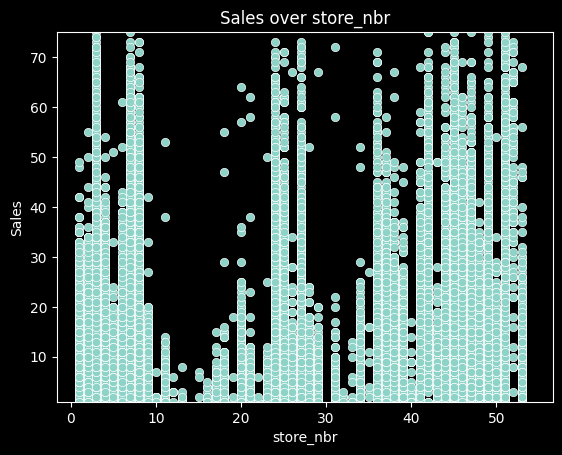

LINGERIE


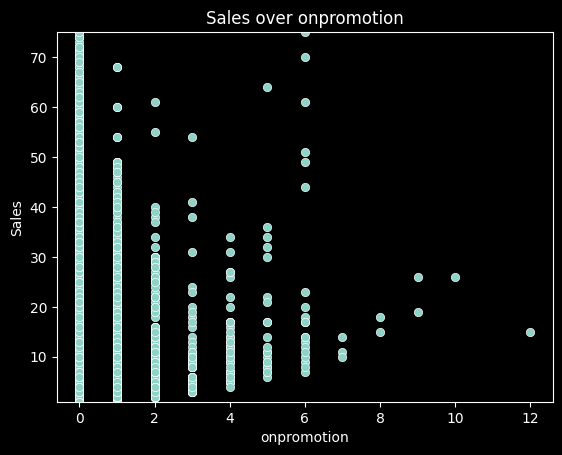

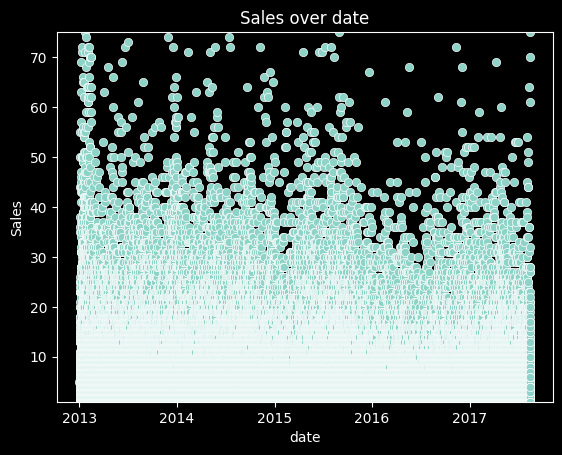

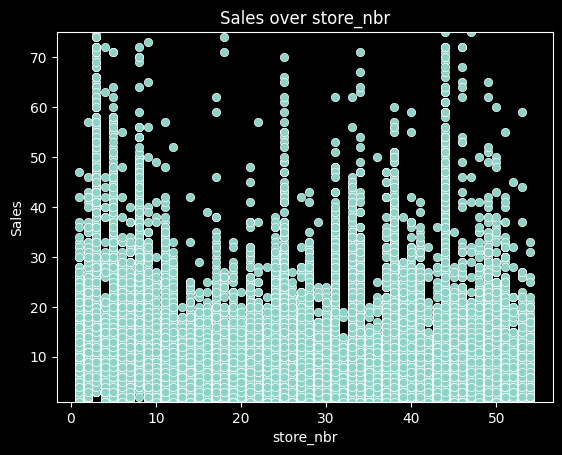

LIQUOR,WINE,BEER


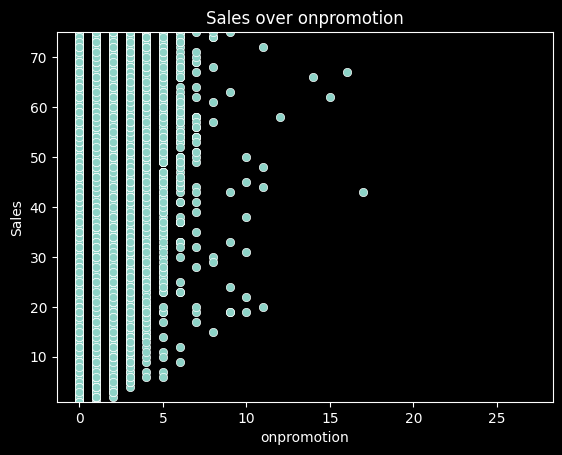

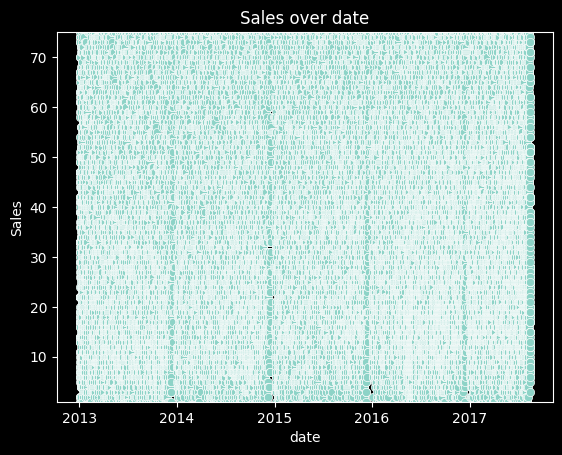

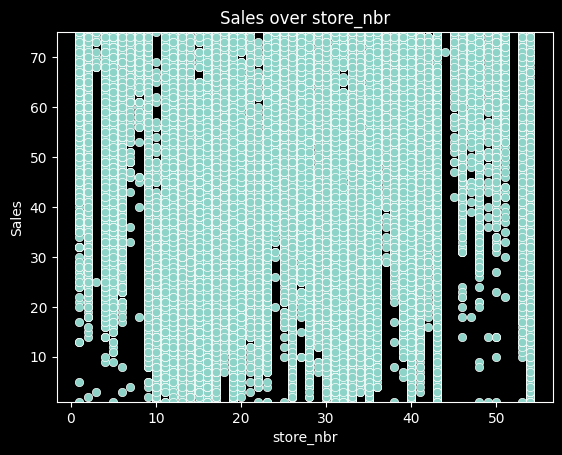

MAGAZINES


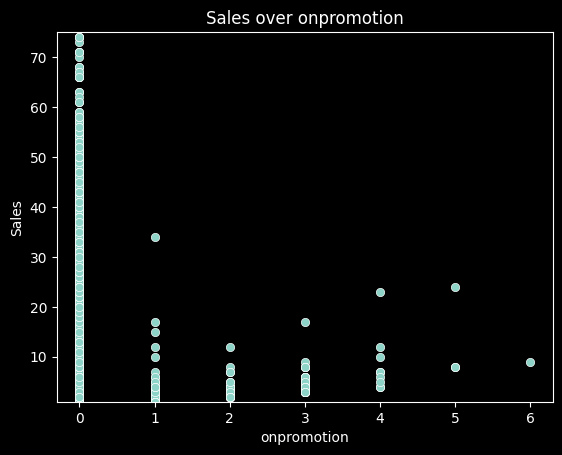

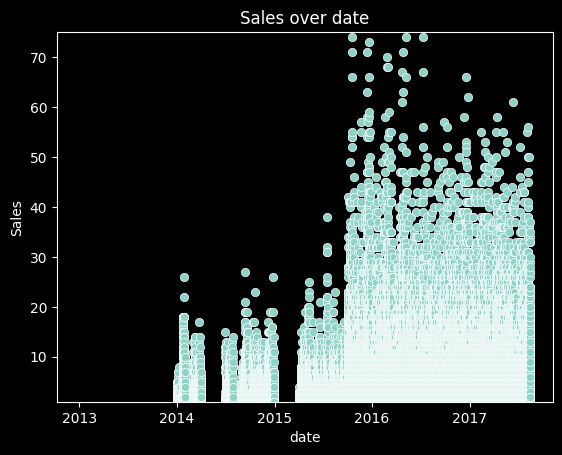

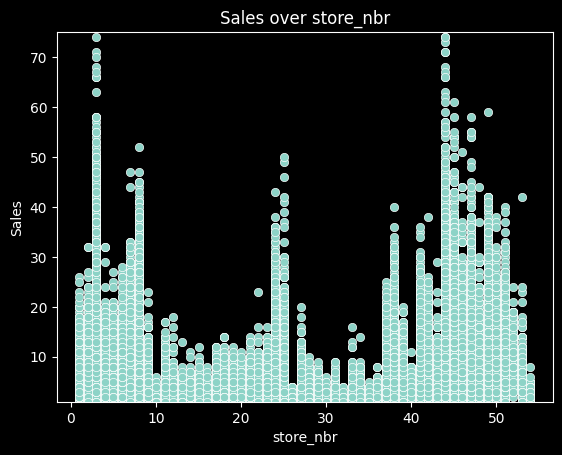

MEATS


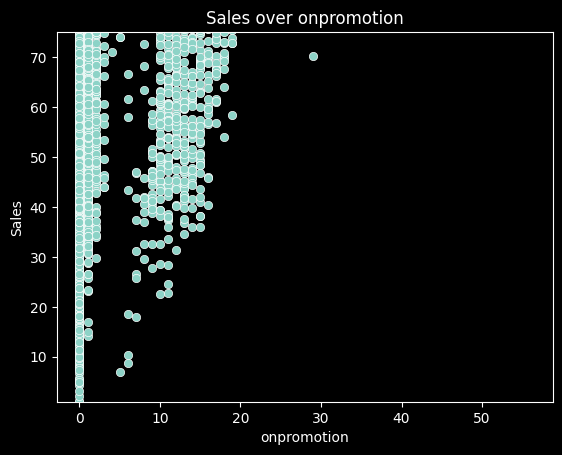

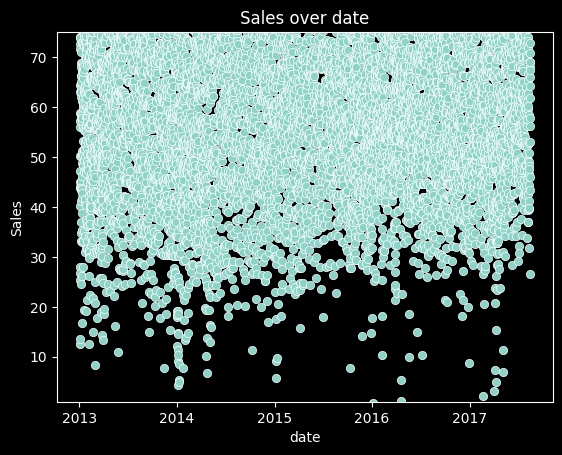

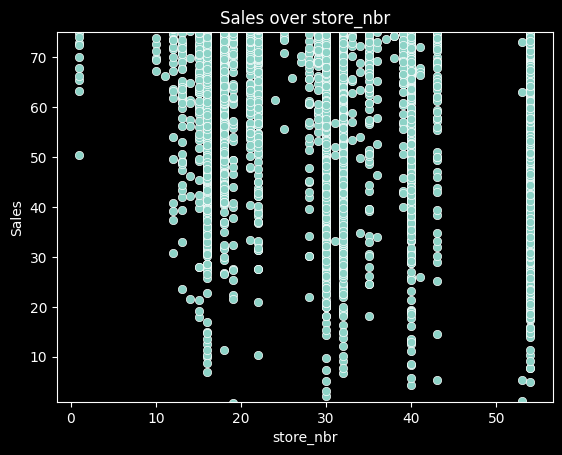

PERSONAL CARE


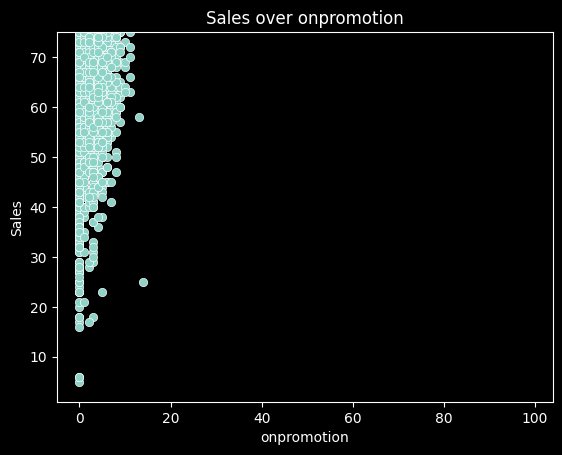

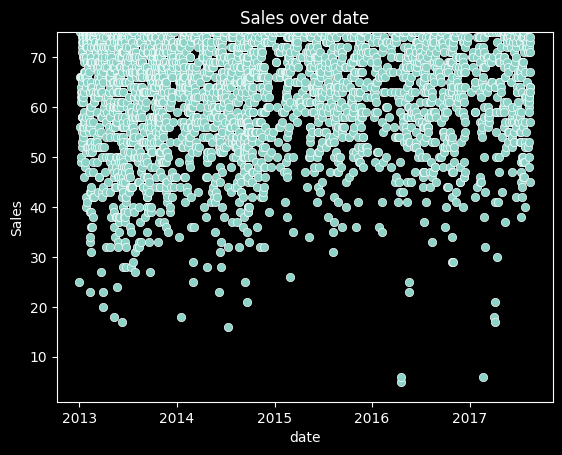

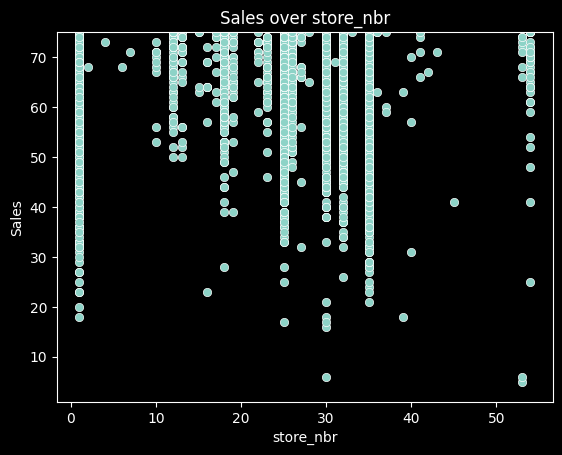

PET SUPPLIES


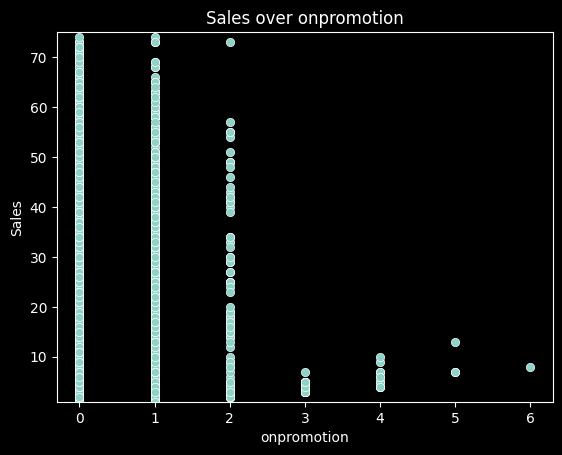

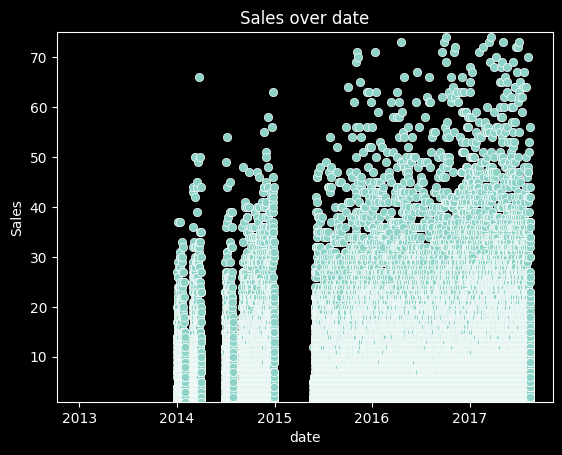

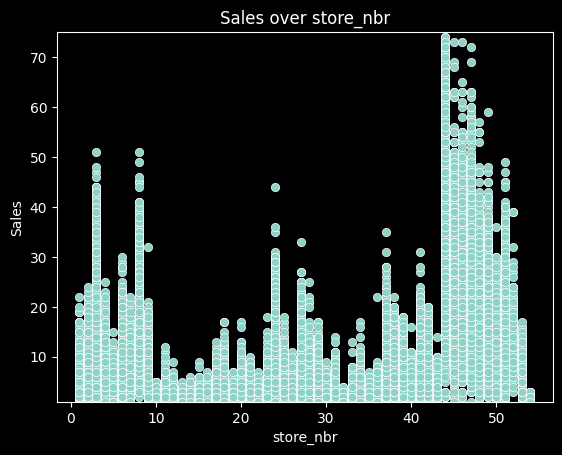

PLAYERS AND ELECTRONICS


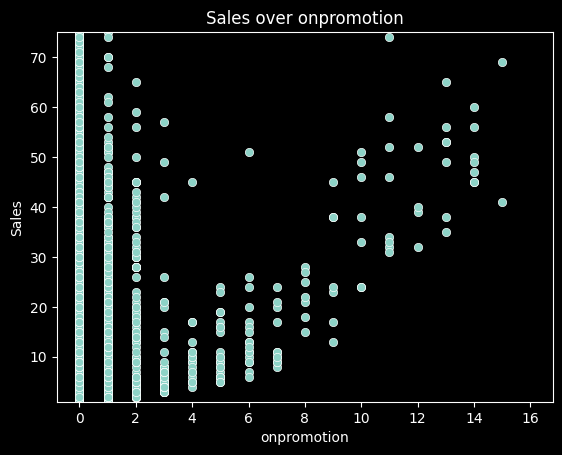

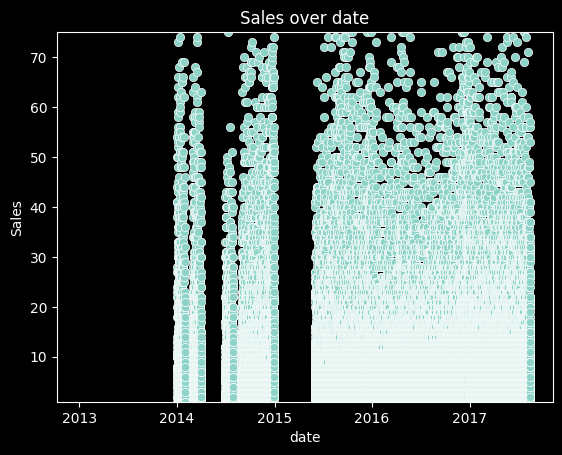

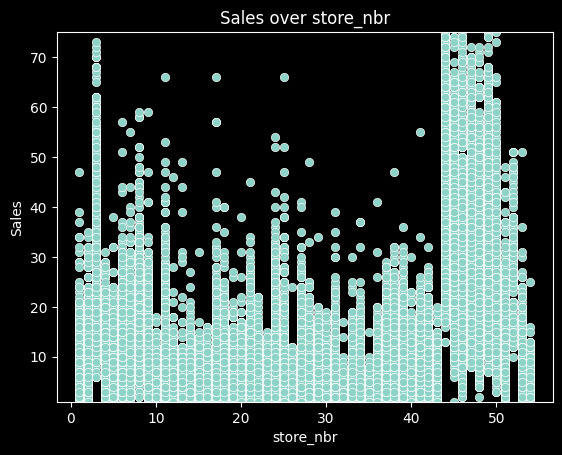

POULTRY


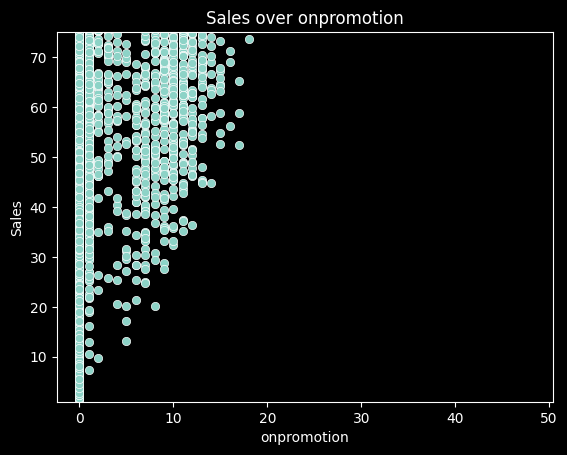

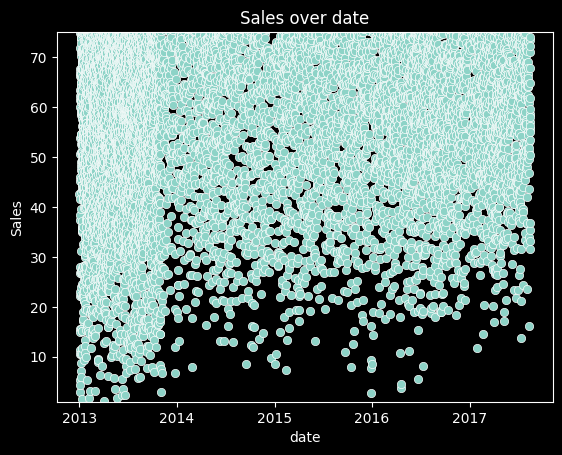

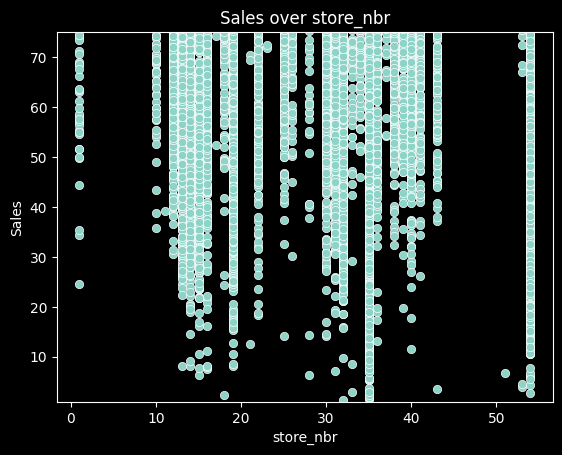

PREPARED FOODS


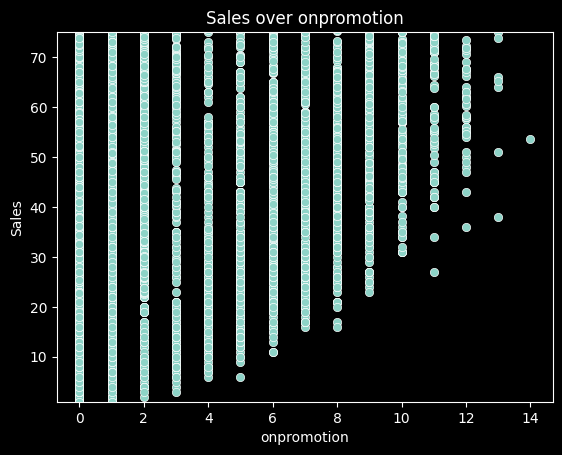

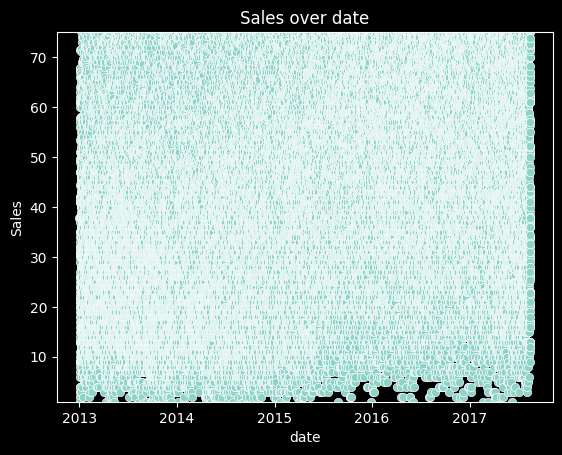

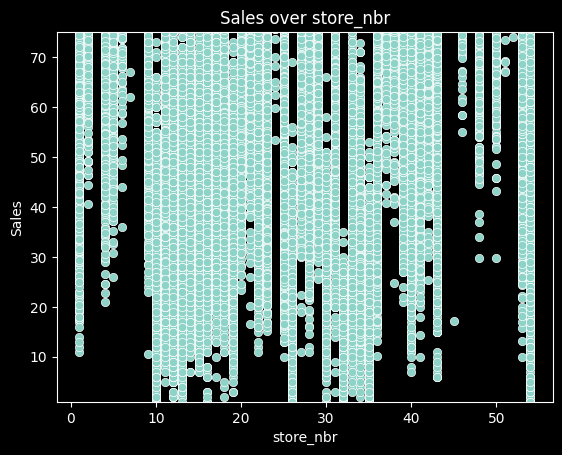

PRODUCE


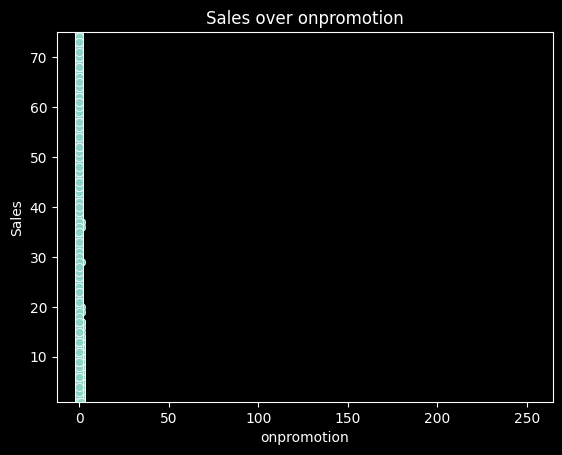

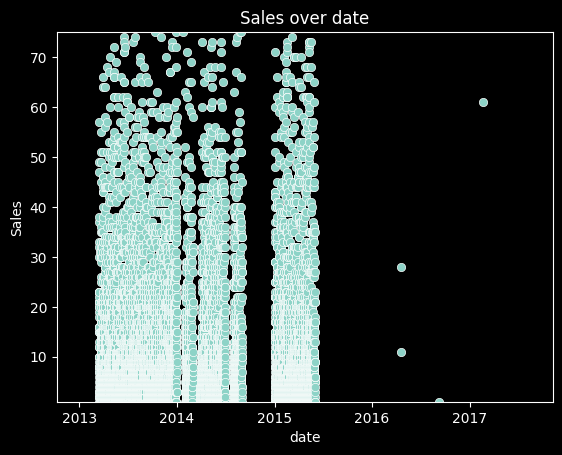

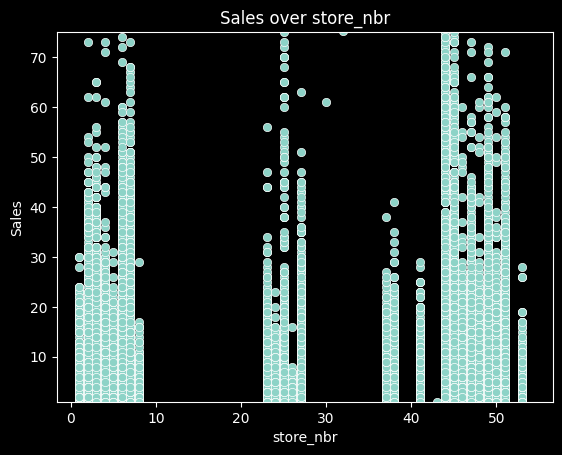

SCHOOL AND OFFICE SUPPLIES


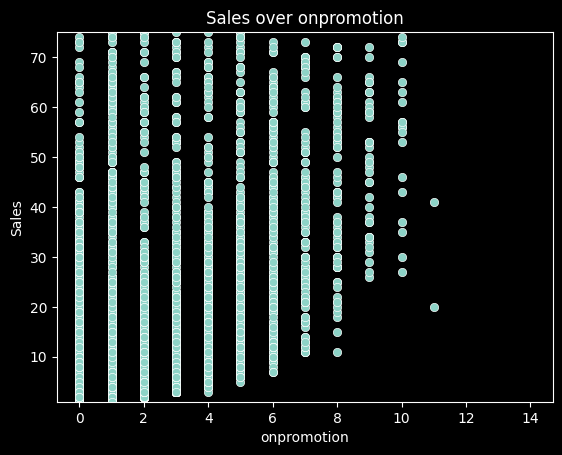

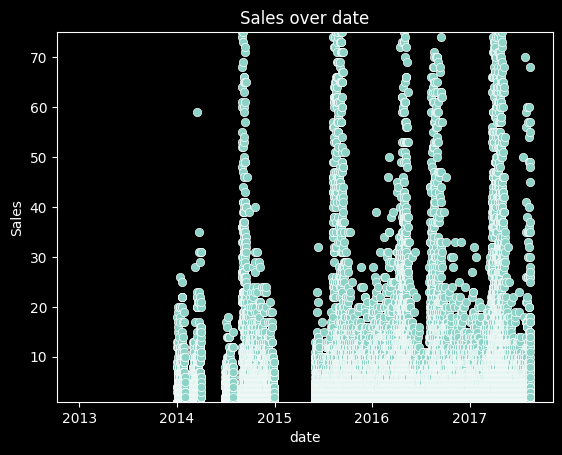

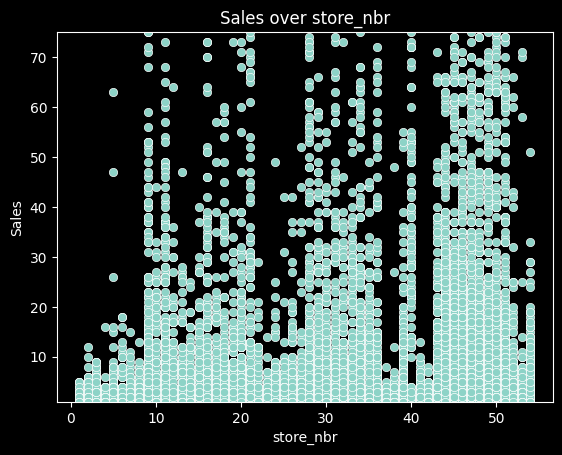

SEAFOOD


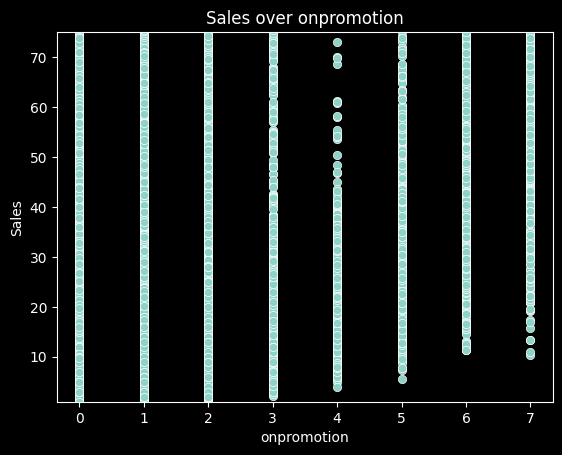

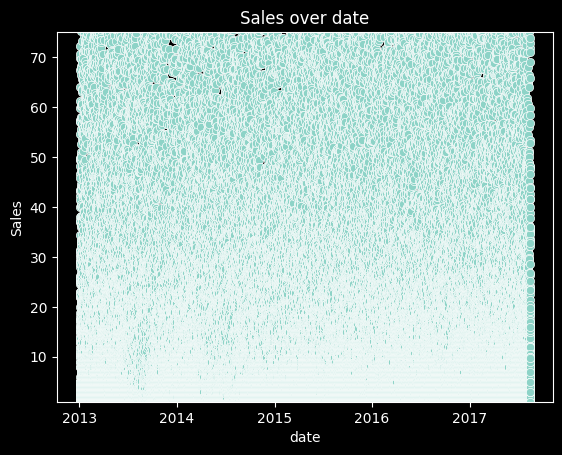

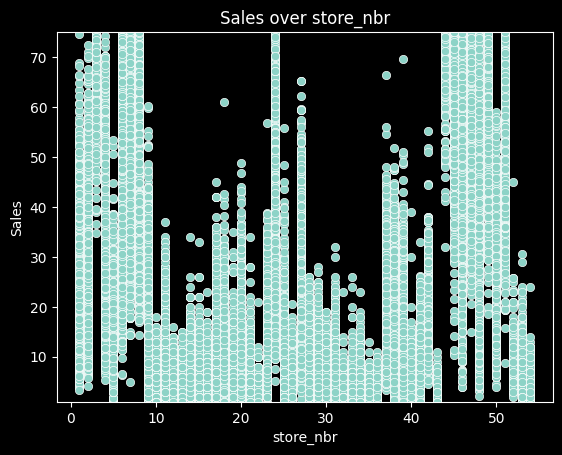

In [40]:
for fam in families:
    print(fam)
    ploter(train_fam[fam])